In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1 = pd.read_csv("over_point_to_case_type.csv",index_col=[0])
data1

,case_id,case_type,final_score,user_id,upload_time,score,over_point
0,2908,string,40.0,3544,1582023290656,40.0,0.000000
1,2908,string,40.0,3544,1582557830339,0.0,0.000000
2,2908,string,40.0,3544,1582557836610,0.0,0.000000
3,2908,string,40.0,3544,1582558130645,0.0,0.000000
4,2908,string,40.0,3544,1582558139684,0.0,0.000000
...,...,...,...,...,...,...,...
87729,2533,sorting_algorithm,100.0,47879,1581990689121,100.0,83.333333
87730,2542,sorting_algorithm,100.0,47879,1582467717077,100.0,83.333333
87731,2528,sorting_algorithm,100.0,47879,1581991378741,100.0,83.333333
87732,2528,sorting_algorithm,100.0,47879,1582467418780,100.0,83.333333


In [3]:
timestamps = []
for i in range(87734):
    timestamp = data1.iloc[i].loc["upload_time"] + 28800000
    timestamps.append(timestamp)
data1["upload_time"] = timestamps

In [5]:
data3 = data1
data3["upload_time"] = pd.to_datetime(data3["upload_time"],unit="ms")
data3

,case_id,case_type,final_score,user_id,upload_time,score,over_point
0,2908,string,40.0,3544,2020-02-18 18:54:50.656,40.0,0.000000
1,2908,string,40.0,3544,2020-02-24 23:23:50.339,0.0,0.000000
2,2908,string,40.0,3544,2020-02-24 23:23:56.610,0.0,0.000000
3,2908,string,40.0,3544,2020-02-24 23:28:50.645,0.0,0.000000
4,2908,string,40.0,3544,2020-02-24 23:28:59.684,0.0,0.000000
...,...,...,...,...,...,...,...
87729,2533,sorting_algorithm,100.0,47879,2020-02-18 09:51:29.121,100.0,83.333333
87730,2542,sorting_algorithm,100.0,47879,2020-02-23 22:21:57.077,100.0,83.333333
87731,2528,sorting_algorithm,100.0,47879,2020-02-18 10:02:58.741,100.0,83.333333
87732,2528,sorting_algorithm,100.0,47879,2020-02-23 22:16:58.780,100.0,83.333333


In [6]:
days = []
for i in range(87734):
    month = data3.iloc[i].loc["upload_time"].strftime("%m")
    month = int(month)
    day = data3.iloc[i].loc["upload_time"].strftime("%d")
    day = int(day)
    day = day - 16 + (month - 2) * 29
    days.append(day)
data3["days"] = days

In [7]:
day_count = data3["days"].value_counts().drop(labels=[-1,-2])
day_count

44    7016
43    3950
3     3141
2     3071
6     3004
7     2833
16    2786
14    2504
11    2450
5     2405
13    2369
42    2361
9     2324
8     2176
12    2174
30    2162
4     2149
15    2141
17    2054
10    2010
31    1828
29    1783
32    1783
36    1713
35    1699
38    1643
40    1621
28    1564
41    1556
33    1537
34    1491
37    1489
18    1402
27    1378
1     1323
39    1258
26    1251
22    1014
21    1013
24     941
20     927
25     917
23     741
19     624
Name: days, dtype: int64

In [8]:
day_count.sort_index(inplace=True)
day_count

1     1323
2     3071
3     3141
4     2149
5     2405
6     3004
7     2833
8     2176
9     2324
10    2010
11    2450
12    2174
13    2369
14    2504
15    2141
16    2786
17    2054
18    1402
19     624
20     927
21    1013
22    1014
23     741
24     941
25     917
26    1251
27    1378
28    1564
29    1783
30    2162
31    1828
32    1783
33    1537
34    1491
35    1699
36    1713
37    1489
38    1643
39    1258
40    1621
41    1556
42    2361
43    3950
44    7016
Name: days, dtype: int64

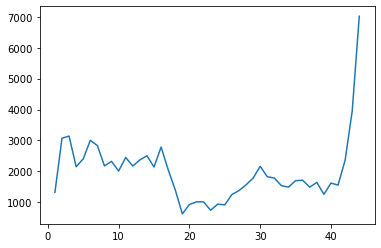

In [9]:
plt.plot(day_count)

In [10]:
data4 = data3.drop_duplicates(subset=["case_id","user_id"])
data4

,case_id,case_type,final_score,user_id,upload_time,score,over_point,days
0,2908,string,40.0,3544,2020-02-18 18:54:50.656,40.0,0.000000,2
24,2172,linear_table,100.0,3544,2020-03-03 13:31:40.962,100.0,100.000000,16
32,2176,array,50.0,3544,2020-02-17 22:09:14.050,0.0,41.967188,1
36,2307,array,25.0,3544,2020-03-14 22:45:29.500,25.0,41.967188,27
37,2804,array,0.0,3544,2020-02-19 17:09:16.125,0.0,41.967188,3
...,...,...,...,...,...,...,...,...
87728,2534,sorting_algorithm,100.0,47879,2020-02-18 11:27:02.535,100.0,83.333333,2
87729,2533,sorting_algorithm,100.0,47879,2020-02-18 09:51:29.121,100.0,83.333333,2
87730,2542,sorting_algorithm,100.0,47879,2020-02-23 22:21:57.077,100.0,83.333333,7
87731,2528,sorting_algorithm,100.0,47879,2020-02-18 10:02:58.741,100.0,83.333333,2


In [11]:
day_count2 = data4["days"].value_counts().drop(labels=[-1,-2])
day_count2

44    3799
43    1711
2     1556
3     1511
6     1388
7     1382
16    1258
5     1242
14    1195
4     1137
13    1134
42    1128
11    1123
12    1078
17    1067
9     1021
30    1010
15     995
10     972
8      961
29     915
28     903
31     858
35     843
36     810
32     792
41     729
1      725
37     722
18     716
34     708
27     702
40     700
38     693
33     683
39     670
26     658
21     551
25     477
24     469
22     432
20     423
19     418
23     374
Name: days, dtype: int64

In [12]:
day_count2.sort_index(inplace=True)
day_count2

1      725
2     1556
3     1511
4     1137
5     1242
6     1388
7     1382
8      961
9     1021
10     972
11    1123
12    1078
13    1134
14    1195
15     995
16    1258
17    1067
18     716
19     418
20     423
21     551
22     432
23     374
24     469
25     477
26     658
27     702
28     903
29     915
30    1010
31     858
32     792
33     683
34     708
35     843
36     810
37     722
38     693
39     670
40     700
41     729
42    1128
43    1711
44    3799
Name: days, dtype: int64

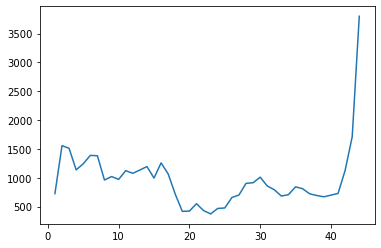

In [13]:
plt.plot(day_count2)

In [14]:
hours = []
for i in range(87734):
    hour = data3.iloc[i].loc["upload_time"].strftime("%H")
    hour = int(hour)
    minute = data3.iloc[i].loc["upload_time"].strftime("%M")
    minute = int(minute)
    hour = hour + ((int)(minute/12))/5.0
    hours.append(hour)
data3["hours"] = hours
data3

,case_id,case_type,final_score,user_id,upload_time,score,over_point,days,hours
0,2908,string,40.0,3544,2020-02-18 18:54:50.656,40.0,0.000000,2,18.8
1,2908,string,40.0,3544,2020-02-24 23:23:50.339,0.0,0.000000,8,23.2
2,2908,string,40.0,3544,2020-02-24 23:23:56.610,0.0,0.000000,8,23.2
3,2908,string,40.0,3544,2020-02-24 23:28:50.645,0.0,0.000000,8,23.4
4,2908,string,40.0,3544,2020-02-24 23:28:59.684,0.0,0.000000,8,23.4
...,...,...,...,...,...,...,...,...,...
87729,2533,sorting_algorithm,100.0,47879,2020-02-18 09:51:29.121,100.0,83.333333,2,9.8
87730,2542,sorting_algorithm,100.0,47879,2020-02-23 22:21:57.077,100.0,83.333333,7,22.2
87731,2528,sorting_algorithm,100.0,47879,2020-02-18 10:02:58.741,100.0,83.333333,2,10.0
87732,2528,sorting_algorithm,100.0,47879,2020-02-23 22:16:58.780,100.0,83.333333,7,22.2


In [15]:
hour_count = data3["hours"].value_counts()
hour_count

21.2    1750
21.4    1664
22.4    1545
21.8    1516
21.6    1500
        ... 
6.0        5
5.2        5
6.6        4
5.6        4
6.4        3
Name: hours, Length: 120, dtype: int64

In [16]:
data4 = data3.drop_duplicates(subset=["case_id","user_id"])
data4

,case_id,case_type,final_score,user_id,upload_time,score,over_point,days,hours
0,2908,string,40.0,3544,2020-02-18 18:54:50.656,40.0,0.000000,2,18.8
24,2172,linear_table,100.0,3544,2020-03-03 13:31:40.962,100.0,100.000000,16,13.4
32,2176,array,50.0,3544,2020-02-17 22:09:14.050,0.0,41.967188,1,22.0
36,2307,array,25.0,3544,2020-03-14 22:45:29.500,25.0,41.967188,27,22.6
37,2804,array,0.0,3544,2020-02-19 17:09:16.125,0.0,41.967188,3,17.0
...,...,...,...,...,...,...,...,...,...
87728,2534,sorting_algorithm,100.0,47879,2020-02-18 11:27:02.535,100.0,83.333333,2,11.4
87729,2533,sorting_algorithm,100.0,47879,2020-02-18 09:51:29.121,100.0,83.333333,2,9.8
87730,2542,sorting_algorithm,100.0,47879,2020-02-23 22:21:57.077,100.0,83.333333,7,22.2
87731,2528,sorting_algorithm,100.0,47879,2020-02-18 10:02:58.741,100.0,83.333333,2,10.0


In [17]:
hour_count2 = data4["hours"].value_counts()
hour_count2

21.4    858
21.2    844
22.2    820
21.8    813
20.6    802
       ... 
5.2       5
5.4       5
6.6       4
6.4       3
5.6       3
Name: hours, Length: 120, dtype: int64

In [18]:
hour_count.sort_index(inplace=True)
hour_count

0.0      526
0.2      460
0.4      408
0.6      364
0.8      299
        ... 
23.0    1389
23.2    1345
23.4    1240
23.6     997
23.8     855
Name: hours, Length: 120, dtype: int64

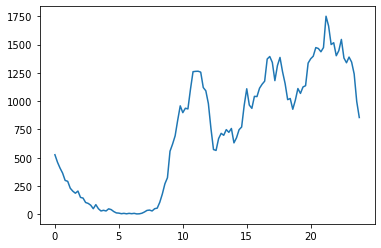

In [19]:
plt.plot(hour_count)

In [20]:
hour_count2.sort_index(inplace=True)
hour_count2

0.0     285
0.2     255
0.4     222
0.6     203
0.8     160
       ... 
23.0    653
23.2    602
23.4    464
23.6    375
23.8    412
Name: hours, Length: 120, dtype: int64

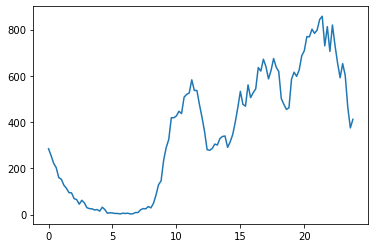

In [21]:
plt.plot(hour_count2)